In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
np.random.seed(2971)
# Load Titanic data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
X

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
886,2,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
888,3,female,NaN,23.4500,S
889,1,male,26.0,30.0000,C


In [5]:
num_f=['Age', 'Fare']
cat_f=['Pclass', 'Sex', 'Embarked']
num_trans= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprossesor = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_f),
        ('cat', cat_trans, cat_f)
    ])
X_processed = preprossesor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=2971)
print("preprossed done")

preprossed done


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

regressor = LogisticRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)



print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       112
           1       0.72      0.69      0.70        67

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



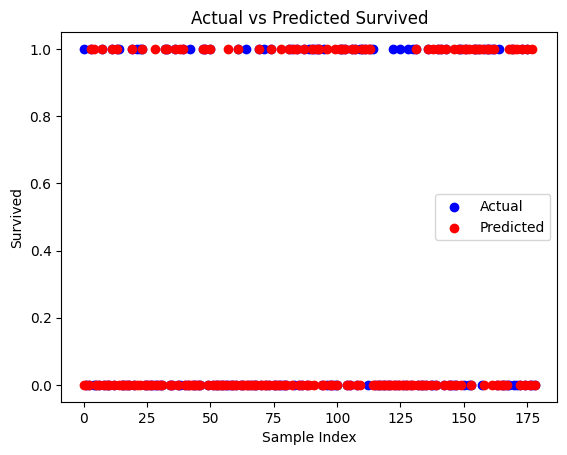

In [7]:
import matplotlib.pyplot as plt

x = list(range(len(y_test)))
plt.scatter(x, y_test, color='blue', label='Actual')
plt.scatter(x, y_pred, color='red', label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("Survived")
plt.title("Actual vs Predicted Survived")
plt.legend()
plt.show()

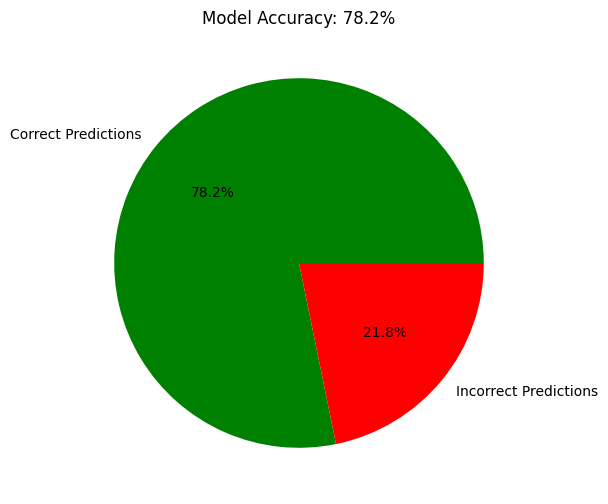

True Negatives (Not Survived & Predicted Not Survived): 94
False Positives (Not Survived & Predicted Survived): 18
False Negatives (Survived & Predicted Not Survived): 21
True Positives (Survived & Predicted Survived): 46


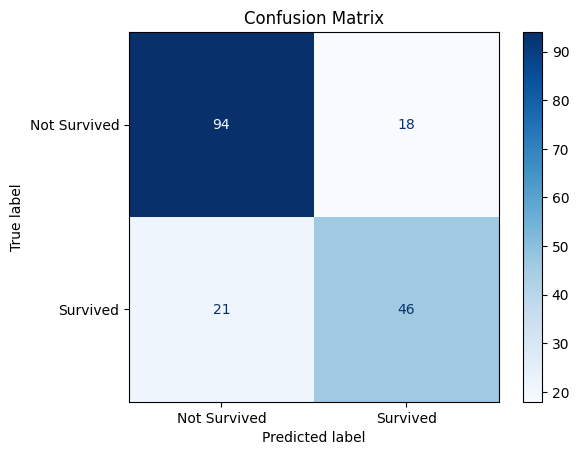

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

correct = sum(y_test == y_pred)
total = len(y_test)
correct_pct = correct / total * 100
incorrect_pct = 100 - correct_pct

plt.figure(figsize=(6, 6))
plt.pie([correct_pct, incorrect_pct], labels=['Correct Predictions', 'Incorrect Predictions'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Model Accuracy: {:.1f}%'.format(correct_pct))
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print(f"True Negatives (Not Survived & Predicted Not Survived): {TN}")
print(f"False Positives (Not Survived & Predicted Survived): {FP}")
print(f"False Negatives (Survived & Predicted Not Survived): {FN}")
print(f"True Positives (Survived & Predicted Survived): {TP}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()